# IS319 - Deep Learning

## TP1 - Neural networks

The goal of this TP is to implement a simple feedforward neural network, but without the use of libraries like PyTorch or TensorFlow. We will only use NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 1. Activation function and its derivative

**(Question)** Implement the following activation function and its respective gradient (vector of partial derivatives). These should be applied element-wise to the input vector `a`.

In [2]:
def sigmoid(a):
    '''Return the element-wise sigmoid of the input vector.'''
    return 1 / (1 + np.exp(-a))

def d_sigmoid(a):
    '''Return the partial derivatives of the sigmoid function
    with respect to the input vector.'''
    return np.exp(-a) / ((1 + np.exp(-a)) ** 2)

In [3]:
a = np.random.randn(100)
assert np.all(sigmoid(a) >= 0.)
assert np.all(sigmoid(a) <= 1.)
assert sigmoid(0.) == 0.5
assert np.all(d_sigmoid(a) >= 0.)
assert np.all(d_sigmoid(a) <= 0.25)

## 2. Loss function and its derivative

**(Question)** Implement the following loss function and its respective gradient (vector of partial derivatives).

`y` and `d` correspond to predictions and ground-truth labels respectively. They are assumed to be be matrices of size `n_classes * n_samples`.

In [4]:
def squared_error(y, d):
    '''Return a scalar corresponding to the sum of squared errors.'''
    return np.sum((y - d) ** 2)

def d_squared_error(y, d):
    '''Return the vector of partial derivatives of the sum of
    squared errors with respect to the predictions.'''
    return 2 * (y - d)

In [5]:
y = np.random.randn(3, 100)
d = np.random.randn(3, 100)
assert squared_error(y, d) >= 0.
assert d_squared_error(y, d).shape == y.shape

## 3. Neural network architecture

We will implement a simple fully-connected neural network with **one hidden layer** and **one output layer**.

This neural network is defined by a number of inputs, a number of hidden units, and a number of output units.

The activation function will be sigmoid and the loss function will be the sum of squared errors, both implemented above.

**(Question)** Complete the class below to initialize the weights and biases randomly.

In [6]:
class NeuralNetwork():
    def __init__(self, n_input, n_hidden, n_output):
        '''Initialize a neural network with `n_input` input neurons,
        `n_hidden` hidden neurons and `n_output` output neurons.'''
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.init_weights()
        
    def init_weights(self):
        '''Initialize random weights with correct sizes in attributes `W1`, `b1`, `W2` and `b2`.'''
        self.W1 = np.random.randn(self.n_hidden, self.n_input) 
        self.b1 = np.zeros((self.n_hidden, 1))                   

        self.W2 = np.random.randn(self.n_output, self.n_hidden) 
        self.b2 = np.zeros((self.n_output, 1))

In [7]:
nn = NeuralNetwork(64, 32, 3)
assert nn.W1.ndim == 2
assert nn.b1.ndim == 2
assert nn.W2.ndim == 2
assert nn.b2.ndim == 2

## 4. Forward pass

The forward pass is defined as:
$$\begin{align*}
\mathbf{h}_1 &= \sigma(\mathbf{a}_1) \quad\text{with}\quad \mathbf{a}_1 = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1 \\
\mathbf{y} &= \sigma(\mathbf{a}_2) \quad\text{with}\quad \mathbf{a}_2 = \mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2
\end{align*}$$

**(Question)** Implement the forward pass for input examples `X`. Save intermediate results `a1`, `h1` and `a2` into attributes (as they will be needed for the backpropagation algorithm).

In [8]:
class NeuralNetwork(NeuralNetwork): # (the method will be added to the `NeuralNetwork` class)
    def forward(self, X):
        self.a1 = np.dot(self.W1, X) + self.b1
        self.h1 = sigmoid(self.a1)
        self.a2 = np.dot(self.W2, self.h1) + self.b2

        return sigmoid(self.a2)

In [9]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
y = nn.forward(X)
assert y.shape == (3, 100)

**(Question)** Implement the function below to obtain a classification decision from the network. To do that, apply the forward pass, then choose the class corresponding to the maximum output value.

In [10]:
class NeuralNetwork(NeuralNetwork): # (the method will be added to the `NeuralNetwork` class)
    def predict(self, X):
        return np.argmax(self.forward(X), axis=0)

In [11]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
y = nn.predict(X)
assert y.shape == (100,)
assert np.any(y == 0) or np.any(y == 1) or np.any(y == 2)

## 5. Backward pass

**(Question)** Implement the backward pass for input examples `X`, ground-truth `d`, predictions `y`.

*Advice 1:* start by working on weights `d_W2` and `d_W1`, then work on the biases `d_b2` and `d_b1`.

*Advice 2:* keep track of the shapes of each partial derivatives using comments.

In [12]:
class NeuralNetwork(NeuralNetwork):
    def backward(self, X, y, d):
        '''Compute the partial derivatives of the loss function
        with respect to all weights of the neural network.
        Return these in variables `d_W1`, `d_b1`, `d_W2` and `d_b2`.'''
        # Backpropagation for the output layer
        # You should compute d_ey, d_ya2, d_a2w2 and finally delta2
        # Then, you can compute d_W2 and d_b2
        
        d_ey = d_squared_error(y, d)
        d_ya2 = d_sigmoid(self.a2)
        d_a2w2 = self.h1.T
        delta2 = d_ey * d_ya2

        d_W2 = np.dot(delta2, d_a2w2)
        d_b2 = np.sum(delta2, axis=1, keepdims=True)

        # Backpropagation for the hidden layer
        # You should compute d_h1a1 and finally delta1
        # Then, you can compute d_W1 and d_b1

        d_h1a1 = np.dot(self.W2.T, delta2)
        delta1 = d_h1a1 * d_sigmoid(self.a1)

        d_W1 = np.dot(delta1, X.T)
        d_b1 = np.sum(delta1, axis=1, keepdims=True)

        return d_W1, d_b1, d_W2, d_b2

In [13]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
d = np.random.randint(0, 2, size=(3, 100))
y = nn.forward(X)
loss = squared_error(y, d)
d_W1, d_b1, d_W2, d_b2 = nn.backward(X, y, d)
assert d_W1.shape == nn.W1.shape
assert d_b1.shape == nn.b1.shape
assert d_W2.shape == nn.W2.shape
assert d_b2.shape == nn.b2.shape

## 6. Weights update with gradient descent

**(Question)** Complete the following code to implement one iteration of the training process:
- Apply the forward pass on training data and compute the loss
- Apply backpropagation to compute the gradient of the loss with respect to the network parameters
- Apply gradient descent to update the network parameters

In [14]:
class NeuralNetwork(NeuralNetwork):
    def train_iteration(self, X, d, lr=1e-2):
        # Apply the forward pass and compute the loss
        y = self.forward(X)
        loss = squared_error(y, d)
        
        # Apply backpropagation to compute the gradients
        d_W1, d_b1, d_W2, d_b2 = self.backward(X, y, d)

        # Apply gradient descent to update the weights
        self.W1 -= lr * d_W1
        self.b1 -= lr * d_b1
        self.W2 -= lr * d_W2
        self.b2 -= lr * d_b2   

        return loss

In [15]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
d = np.random.randint(0, 2, size=(3, 100))
loss = nn.train_iteration(X, d, lr=100)
assert loss >= 0.

## 7. Mini-batch training loop

Now, we will implement the main training loop of our neural network.

We will use stochastic gradient descent with mini-batch: the weights will be updated by performing gradient descent on shuffled subsets of training data.

We will train the network for a number of epochs (an epoch is performed when the whole training set has been used with this mini-batch procedure).

**(Question)** Complete the code below to implement the training loop with minibatch stochastic gradient descent.

In [16]:
class NeuralNetwork(NeuralNetwork):
    def fit(self, X, d, batch_size, n_epochs=10, lr=1e-2):
        n_samples = X.shape[1]
        n_batches = (n_samples // batch_size) + 1

        for e in range(n_epochs):
            epoch_loss = 0.  # Reset epoch loss for each epoch
            
            # Shuffle dataset
            permutation = np.random.permutation(n_samples)
            X, d = X[:, permutation], d[:, permutation]
            
            # Loop over each batch
            for b in range(0, n_samples, batch_size):
                # Grab the current batch in `X_batch` and `d_batch`
                X_batch = X[:, b:b+batch_size]
                d_batch = d[:, b:b+batch_size]
                
                # Apply training iteration and update epoch loss
                loss = self.train_iteration(X_batch, d_batch, lr)
                epoch_loss += loss
            
            # Compute average epoch loss and print it
            avg_epoch_loss = epoch_loss / n_batches
            print(f'Epoch {e+1}/{n_epochs}, Loss: {avg_epoch_loss:.6f}')

## 8. Train the network on the MNIST dataset

The MNIST dataset is composed of 70000 greyscale images of handwritten digits: 60000 images for training and 10000 for testing.

It is included in the `mnist.tgz` archive provided with this TP.

In [17]:
!tar xvzf ./mnist.tgz
images_train = np.load('./mnist-train-images.npy')
labels_train = np.load('./mnist-train-labels.npy')
images_test = np.load('./mnist-test-images.npy')
labels_test = np.load('./mnist-test-labels.npy')

tar (child): ./mnist.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


**(Question)** Reshape the images into vectors and normalize the pixel values between 0 and 1. Convert the labels into one-hot vectors (*i.e.* vectors full of 0 and with only a 1 for the corresponding class). Store the results into `X_train`, `y_train`, `X_test` and `y_test` variables. Make sure to reshape to the following:
- Input data: `n_features x n_samples`
- Labels: `n_classes x n_samples`

In [18]:
X_train = images_train.reshape(images_train.shape[0], -1).T / 255.0
X_test = images_test.reshape(images_test.shape[0], -1).T / 255.0

n_classes = len(np.unique(labels_train))

def one_hot_encode(labels, n_classes):
    one_hot = np.zeros((n_classes, labels.shape[0]))
    one_hot[labels, np.arange(labels.shape[0])] = 1
    return one_hot

y_train = one_hot_encode(labels_train, n_classes)
y_test = one_hot_encode(labels_test, n_classes)

In [19]:
assert np.all(X_train >= 0.) and np.all(X_train <= 1.)
assert np.all(X_test >= 0.) and np.all(X_test <= 1.)
assert np.all(np.unique(y_train) == np.array([0., 1.])) 
assert np.all(np.unique(y_test) == np.array([0., 1.]))
assert np.all(np.sum(y_train, axis=0) == 1.)
assert np.all(np.sum(y_test, axis=0) == 1.)

**(Question)** Initialize a neural network for MNIST with 32 hidden units and train it for 10 epochs with a batch size of 512.

In [44]:
nn1 = NeuralNetwork(n_input=X_train.shape[0], n_hidden=32, n_output=10)

nn1.fit(X_train, y_train, 512, 10)

Epoch 1/10, Loss: 391.761641
Epoch 2/10, Loss: 220.965842
Epoch 3/10, Loss: 166.820945
Epoch 4/10, Loss: 121.804507
Epoch 5/10, Loss: 104.047540
Epoch 6/10, Loss: 93.861681
Epoch 7/10, Loss: 86.891602
Epoch 8/10, Loss: 81.387450
Epoch 9/10, Loss: 77.256387
Epoch 10/10, Loss: 73.672018


**(Question)** Compute the classification accuracy on the train and test sets. To do that, you can use the predict function and compare them with the original labels (*i.e.* without one-hot encoding).

In [45]:
train_prediction = nn1.predict(X_train)
test_prediction = nn1.predict(X_test)

In [46]:
train_accuracy = np.mean((labels_train == train_prediction).astype(int)) * 100
print(f"Training Accuracy : {train_accuracy:.4f}%")

test_accuracy = np.mean((labels_test == test_prediction).astype(int)) * 100
print(f"Testing Accuracy : {test_accuracy:.4f}%")

Training Accuracy : 91.4783%
Testing Accuracy : 91.5100%


**(Question)** Compute and plot the confusion matrix for the test set. Which are the most difficult classes? Show some examples of misclassified images.

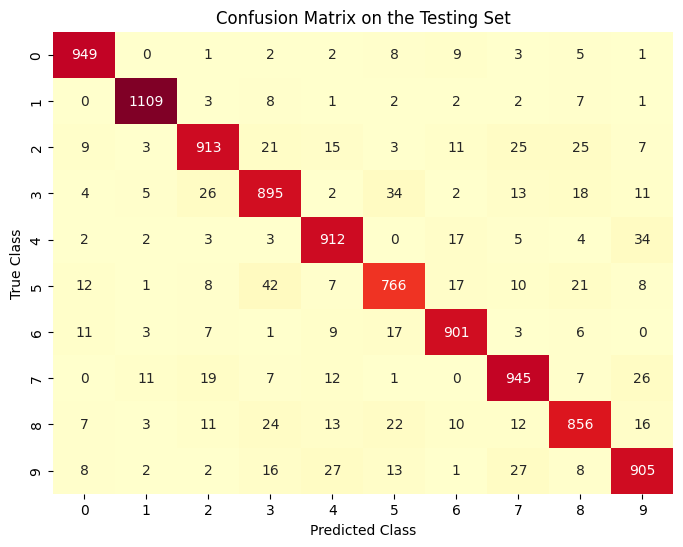

In [47]:
cm1 = confusion_matrix(labels_test, test_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap=plt.cm.YlOrRd, cbar=False)
plt.title(r"Confusion Matrix on the Testing Set")
plt.xlabel(r"Predicted Class")
plt.ylabel(r"True Class")
plt.show()

Looking at the confusion matrix, we see that the model predicts the right class most of the time. However, there are 10% of wrong predictions. Most of the time, the model inverts classes 3 and 5, which might be logical given their rather similar shapes.

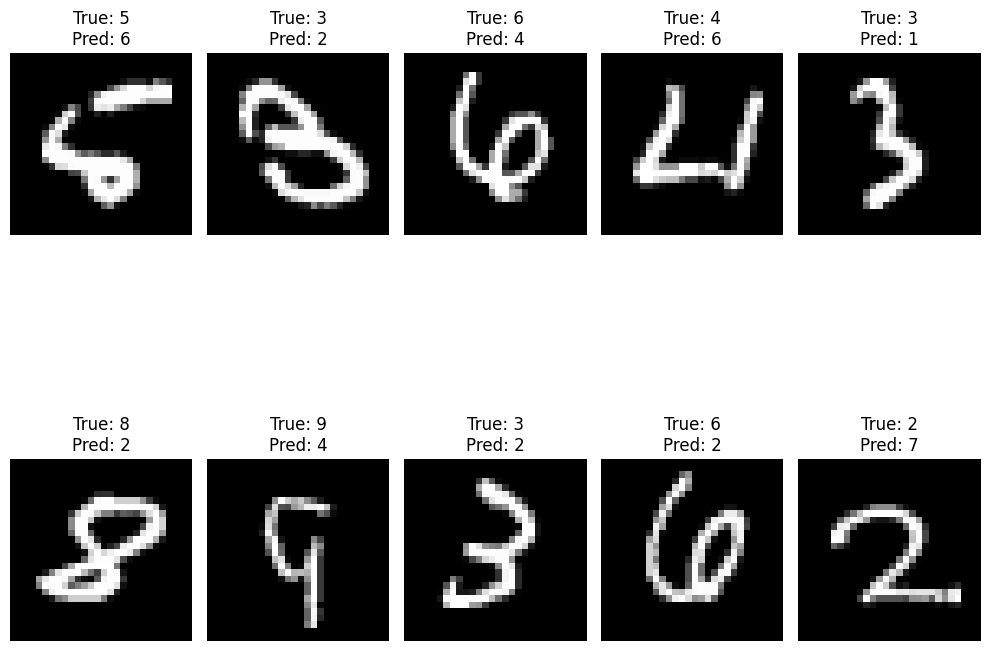

In [48]:
misclassified_indices = np.where(test_prediction != labels_test)[0]

num_examples = 10
plt.figure(figsize=(10, 10))

for i, index in enumerate(misclassified_indices[:num_examples]):
    plt.subplot(2, 5, i + 1)
    img = X_test[:, index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {labels_test[index]}\nPred: {test_prediction[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**(Question)** Play around with hyperparameters of the model. What happens when the batch size if very small? And very large?

In [25]:
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, len(X_train.T)]
train_accuracy_batch_list = []
test_accuracy_batch_list = []

for batch_size in batch_sizes:
    print(f"\nTraining with batch size = {batch_size}")
    nn_batch = NeuralNetwork(n_input=X_train.shape[0], n_hidden=32, n_output=10)
    nn_batch.fit(X_train, y_train, batch_size=batch_size, n_epochs=10, lr=1e-2)

    train_prediction_batch = nn_batch.predict(X_train)
    train_accuracy_batch = np.mean((labels_train == train_prediction_batch).astype(int)) * 100
    train_accuracy_batch_list.append(train_accuracy_batch)

    test_prediction_batch = nn_batch.predict(X_test)
    test_accuracy_batch = np.mean((labels_test == test_prediction_batch).astype(int)) * 100
    test_accuracy_batch_list.append(test_accuracy_batch)
    print(f"Test accuracy with batch size {batch_size}: {test_accuracy_batch:.4f}")


Training with batch size = 1
Epoch 1/10, Loss: 0.711007
Epoch 2/10, Loss: 0.432822
Epoch 3/10, Loss: 0.323115
Epoch 4/10, Loss: 0.234702
Epoch 5/10, Loss: 0.203090
Epoch 6/10, Loss: 0.184267
Epoch 7/10, Loss: 0.171304
Epoch 8/10, Loss: 0.161601
Epoch 9/10, Loss: 0.153713
Epoch 10/10, Loss: 0.147275
Test accuracy with batch size 1: 91.3100

Training with batch size = 2
Epoch 1/10, Loss: 1.566124
Epoch 2/10, Loss: 0.963545
Epoch 3/10, Loss: 0.825453
Epoch 4/10, Loss: 0.763989
Epoch 5/10, Loss: 0.727661
Epoch 6/10, Loss: 0.702933
Epoch 7/10, Loss: 0.684174
Epoch 8/10, Loss: 0.669625
Epoch 9/10, Loss: 0.657448
Epoch 10/10, Loss: 0.647217
Test accuracy with batch size 2: 73.9100

Training with batch size = 4
Epoch 1/10, Loss: 2.543195
Epoch 2/10, Loss: 1.557478
Epoch 3/10, Loss: 1.273282
Epoch 4/10, Loss: 1.141658
Epoch 5/10, Loss: 1.063799
Epoch 6/10, Loss: 0.869655
Epoch 7/10, Loss: 0.734112
Epoch 8/10, Loss: 0.682104
Epoch 9/10, Loss: 0.645158
Epoch 10/10, Loss: 0.616538
Test accuracy w

/tmp/ipykernel_4483/1759356747.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_4483/1759356747.py:8: RuntimeWarning: overflow encountered in exp
  return np.exp(-a) / ((1 + np.exp(-a)) ** 2)
/tmp/ipykernel_4483/1759356747.py:8: RuntimeWarning: overflow encountered in square
  return np.exp(-a) / ((1 + np.exp(-a)) ** 2)
/tmp/ipykernel_4483/1759356747.py:8: RuntimeWarning: invalid value encountered in divide
  return np.exp(-a) / ((1 + np.exp(-a)) ** 2)


Epoch 2/10, Loss: 29999.971479
Epoch 3/10, Loss: nan
Epoch 4/10, Loss: nan
Epoch 5/10, Loss: nan
Epoch 6/10, Loss: nan
Epoch 7/10, Loss: nan
Epoch 8/10, Loss: nan
Epoch 9/10, Loss: nan
Epoch 10/10, Loss: nan
Test accuracy with batch size 60000: 9.8000


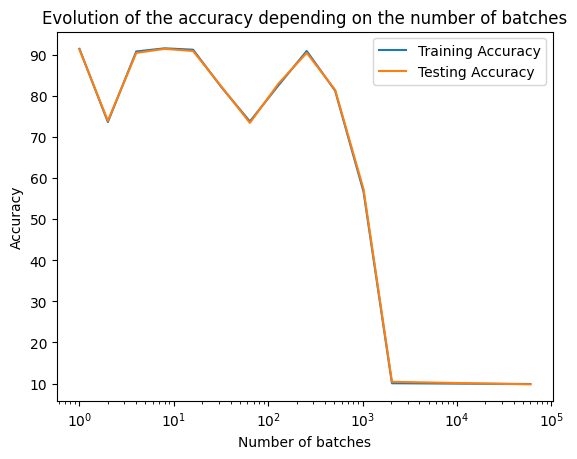

In [26]:
plt.plot(batch_sizes, train_accuracy_batch_list, label=r'Training Accuracy')
plt.plot(batch_sizes, test_accuracy_batch_list, label=r'Testing Accuracy')
plt.xlabel(r'Number of batches')
plt.ylabel(r'Accuracy')
plt.xscale('log')
plt.title(r'Evolution of the accuracy depending on the number of batches')

plt.legend()
plt.show()

Observing the plot, having a number of batches going from $1$ to $512$ doesn't impact the performance a lot (we stay between $80\%$ and $90\%$). But when taking $1024$, $2048$ or the number of samples as number of batches, we observe a large and fast decrease of accuracy.

According to us, this drop of accuracy is due to the number of epochs that is not high enough to permit the network to learn. Indeed, the higher the number of batches, the lower the number of updates for the weights and biases. To reach a better accuracy for these higher number of batches, we should certainly increase the number of epochs up to $100$ or more to have enough updates in the parameters of the model.

In [27]:
hidden_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_accuracy_hidden_list = []
test_accuracy_hidden_list = []

for hidden_size in hidden_sizes:
    print(f"\nTraining with {hidden_size} hidden layers")
    nn_hidden = NeuralNetwork(n_input=X_train.shape[0], n_hidden=hidden_size, n_output=10)
    nn_hidden.fit(X_train, y_train, batch_size=512, n_epochs=10, lr=1e-2)

    train_prediction_hidden = nn_hidden.predict(X_train)
    train_accuracy_hidden = np.mean((labels_train == train_prediction_hidden).astype(int)) * 100
    train_accuracy_hidden_list.append(train_accuracy_hidden)

    test_prediction_hidden = nn_hidden.predict(X_test)
    test_accuracy_hidden = np.mean((labels_test == test_prediction_hidden).astype(int)) * 100
    test_accuracy_hidden_list.append(test_accuracy_hidden)
    print(f"Test accuracy with {hidden_size} hidden layers: {test_accuracy_hidden:.4f}")


Training with 1 hidden layers
Epoch 1/10, Loss: 446.433454
Epoch 2/10, Loss: 411.841594
Epoch 3/10, Loss: 409.286033
Epoch 4/10, Loss: 408.428323
Epoch 5/10, Loss: 407.859872
Epoch 6/10, Loss: 407.454104
Epoch 7/10, Loss: 407.151301
Epoch 8/10, Loss: 406.921950
Epoch 9/10, Loss: 406.674442
Epoch 10/10, Loss: 406.520875
Test accuracy with 1 hidden layers: 21.1400

Training with 2 hidden layers
Epoch 1/10, Loss: 441.056659
Epoch 2/10, Loss: 385.567037
Epoch 3/10, Loss: 368.919913
Epoch 4/10, Loss: 361.315396
Epoch 5/10, Loss: 356.837921
Epoch 6/10, Loss: 353.963913
Epoch 7/10, Loss: 351.891088
Epoch 8/10, Loss: 350.092325
Epoch 9/10, Loss: 348.739136
Epoch 10/10, Loss: 347.422495
Test accuracy with 2 hidden layers: 40.3300

Training with 4 hidden layers
Epoch 1/10, Loss: 410.918795
Epoch 2/10, Loss: 324.394385
Epoch 3/10, Loss: 281.198413
Epoch 4/10, Loss: 261.462260
Epoch 5/10, Loss: 251.617788
Epoch 6/10, Loss: 244.644714
Epoch 7/10, Loss: 239.361073
Epoch 8/10, Loss: 235.242741
Epoch

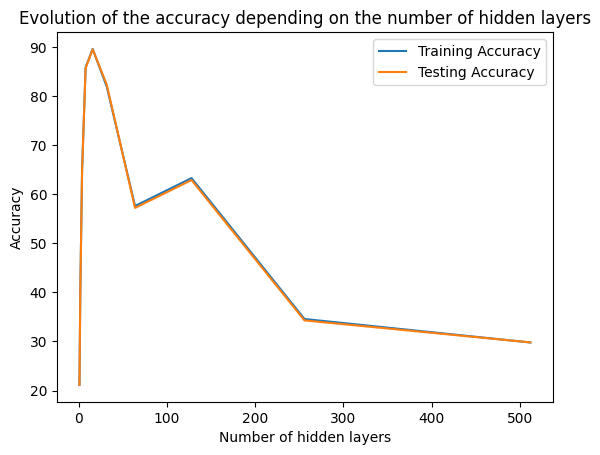

In [28]:
plt.plot(hidden_sizes, train_accuracy_hidden_list, label=r'Training Accuracy')
plt.plot(hidden_sizes, test_accuracy_hidden_list, label=r'Testing Accuracy')
plt.title(r'Evolution of the accuracy depending on the number of hidden layers')
plt.xlabel(r'Number of hidden layers')
plt.ylabel(r'Accuracy')

plt.legend()
plt.show()

This time, we observe that training with few hidden layers ($1$ or $2$) leads to very poor results (between $20$ and $30\%$). Then, we see a high increase from $4$ t $32$ hidden layers to reach a maximum of $91\%$ accuracy on the testing set. And finally, for larger numbers of hidden layers, the accuracy again decreases to reach an accuracy around $10\%$ for $512$ hidden layers. 

This drop of performance is again due to $2$ factors that are the value of the learning rate and the number of epochs. Indeed, when training a deeper Neural Network, we should pay attention to let enough time to the network to learn and adapt its weights and biases. And this can be done with higher number of epochs to let time to the network to explore all the different neurons. Concerning the learning rate, it is possible that this value is not optimal for more hidden layers, causing a slower convergenre (or divergence) when performing the gradient descent.

In [29]:
learning_rates = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
train_accuracy_lr_list = []
test_accuracy_lr_list = []

for lr in learning_rates:
    print(f"\nTraining with a learning rate of {lr}")
    nn_lr = NeuralNetwork(n_input=X_train.shape[0], n_hidden=32, n_output=10)
    nn_lr.fit(X_train, y_train, batch_size=512, n_epochs=10, lr=lr)

    train_prediction_lr = nn_lr.predict(X_train)
    train_accuracy_lr = np.mean((labels_train == train_prediction_lr).astype(int)) * 100
    train_accuracy_lr_list.append(train_accuracy_lr)

    test_prediction_lr = nn_lr.predict(X_test)
    test_accuracy_lr = np.mean((labels_test == test_prediction_lr).astype(int)) * 100
    test_accuracy_lr_list.append(test_accuracy_lr)
    print(f"Test accuracy with a learning rate of {lr}: {test_accuracy_lr:.4f}")


Training with a learning rate of 1e-07


Epoch 1/10, Loss: 3265.603802
Epoch 2/10, Loss: 3261.557805
Epoch 3/10, Loss: 3257.497879
Epoch 4/10, Loss: 3253.423987
Epoch 5/10, Loss: 3249.336098
Epoch 6/10, Loss: 3245.234143
Epoch 7/10, Loss: 3241.118073
Epoch 8/10, Loss: 3236.987870
Epoch 9/10, Loss: 3232.843487
Epoch 10/10, Loss: 3228.684857
Test accuracy with a learning rate of 1e-07: 10.2200

Training with a learning rate of 1e-06
Epoch 1/10, Loss: 1848.958524
Epoch 2/10, Loss: 1824.942449
Epoch 3/10, Loss: 1802.166709
Epoch 4/10, Loss: 1780.575673
Epoch 5/10, Loss: 1760.113571
Epoch 6/10, Loss: 1740.722817
Epoch 7/10, Loss: 1722.347977
Epoch 8/10, Loss: 1704.933008
Epoch 9/10, Loss: 1688.423670
Epoch 10/10, Loss: 1672.769477
Test accuracy with a learning rate of 1e-06: 8.6000

Training with a learning rate of 1e-05
Epoch 1/10, Loss: 1372.010470
Epoch 2/10, Loss: 1054.695914
Epoch 3/10, Loss: 835.017783
Epoch 4/10, Loss: 711.947787
Epoch 5/10, Loss: 643.840988
Epoch 6/10, Loss: 603.850082
Epoch 7/10, Loss: 578.635087
Epoch 8/

/tmp/ipykernel_4483/1759356747.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_4483/1759356747.py:8: RuntimeWarning: overflow encountered in square
  return np.exp(-a) / ((1 + np.exp(-a)) ** 2)
/tmp/ipykernel_4483/1759356747.py:8: RuntimeWarning: overflow encountered in exp
  return np.exp(-a) / ((1 + np.exp(-a)) ** 2)
/tmp/ipykernel_4483/1759356747.py:8: RuntimeWarning: invalid value encountered in divide
  return np.exp(-a) / ((1 + np.exp(-a)) ** 2)


Epoch 1/10, Loss: nan
Epoch 2/10, Loss: nan
Epoch 3/10, Loss: nan
Epoch 4/10, Loss: nan
Epoch 5/10, Loss: nan
Epoch 6/10, Loss: nan
Epoch 7/10, Loss: nan
Epoch 8/10, Loss: nan
Epoch 9/10, Loss: nan
Epoch 10/10, Loss: nan
Test accuracy with a learning rate of 1: 9.8000

Training with a learning rate of 10
Epoch 1/10, Loss: nan
Epoch 2/10, Loss: nan
Epoch 3/10, Loss: nan
Epoch 4/10, Loss: nan
Epoch 5/10, Loss: nan
Epoch 6/10, Loss: nan
Epoch 7/10, Loss: nan
Epoch 8/10, Loss: nan
Epoch 9/10, Loss: nan
Epoch 10/10, Loss: nan
Test accuracy with a learning rate of 10: 9.8000

Training with a learning rate of 100
Epoch 1/10, Loss: nan
Epoch 2/10, Loss: nan
Epoch 3/10, Loss: nan
Epoch 4/10, Loss: nan
Epoch 5/10, Loss: nan
Epoch 6/10, Loss: nan
Epoch 7/10, Loss: nan
Epoch 8/10, Loss: nan
Epoch 9/10, Loss: nan
Epoch 10/10, Loss: nan
Test accuracy with a learning rate of 100: 9.8000

Training with a learning rate of 1000
Epoch 1/10, Loss: nan
Epoch 2/10, Loss: nan
Epoch 3/10, Loss: nan
Epoch 4/10

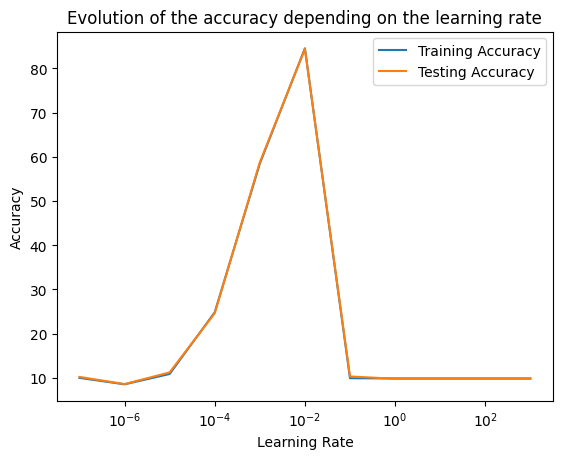

In [30]:
plt.plot(learning_rates, train_accuracy_lr_list, label=r'Training Accuracy')
plt.plot(learning_rates, test_accuracy_lr_list, label=r'Testing Accuracy')
plt.title(r'Evolution of the accuracy depending on the learning rate')
plt.xlabel(r'Learning Rate')
plt.ylabel(r'Accuracy')
plt.xscale('log')

plt.legend()
plt.show()

For the learning rate, we observe that "extreme" values (from $10^{-7}$ to $10^{-4}$ and from $0.1$ to $1000$), the performances of the model do not exceed $18\%$ while it can go to more than $90\%$ if the learning rate is between $0.001$ and $0.01$.

For the low values, the reason of the bad performance is, as before, because the number of epochs is not high enough and therefore, $10$ epochs is not enough to converge and reach a minima.

On the other hand, for the higher values of the learning rate, the reason is surely that the updates make the gradient descent diverge and go to the wront direction (the learning rate has an big impact during the updates of weights and biases).

In [31]:
nb_epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_accuracy_epoch_list = []
test_accuracy_epoch_list = []

for epoch in nb_epochs:
    print(f"\nTraining with a {epoch} epochs")
    nn_epoch = NeuralNetwork(n_input=X_train.shape[0], n_hidden=32, n_output=10)
    nn_epoch.fit(X_train, y_train, batch_size=512, n_epochs=epoch, lr=0.01)

    train_prediction_epoch = nn_epoch.predict(X_train)
    train_accuracy_epoch = np.mean((labels_train == train_prediction_epoch).astype(int)) * 100
    train_accuracy_epoch_list.append(train_accuracy_epoch)

    test_prediction_epoch = nn_epoch.predict(X_test)
    test_accuracy_epoch = np.mean((labels_test == test_prediction_epoch).astype(int)) * 100
    test_accuracy_epoch_list.append(test_accuracy_epoch)
    print(f"Test accuracy with a learning rate of {epoch}: {test_accuracy_epoch:.4f}")


Training with a 10 epochs
Epoch 1/10, Loss: 360.428487
Epoch 2/10, Loss: 188.320509
Epoch 3/10, Loss: 137.356014
Epoch 4/10, Loss: 115.003170
Epoch 5/10, Loss: 101.871362
Epoch 6/10, Loss: 93.061586
Epoch 7/10, Loss: 86.488254
Epoch 8/10, Loss: 81.311945
Epoch 9/10, Loss: 77.198933
Epoch 10/10, Loss: 73.772321
Test accuracy with a learning rate of 10: 91.1700

Training with a 20 epochs
Epoch 1/20, Loss: 356.968034
Epoch 2/20, Loss: 177.711846
Epoch 3/20, Loss: 133.471383
Epoch 4/20, Loss: 112.929530
Epoch 5/20, Loss: 100.698295
Epoch 6/20, Loss: 92.461077
Epoch 7/20, Loss: 86.482113
Epoch 8/20, Loss: 81.781790
Epoch 9/20, Loss: 77.983642
Epoch 10/20, Loss: 74.729448
Epoch 11/20, Loss: 72.051065
Epoch 12/20, Loss: 69.560307
Epoch 13/20, Loss: 67.378979
Epoch 14/20, Loss: 65.470890
Epoch 15/20, Loss: 63.634595
Epoch 16/20, Loss: 62.090621
Epoch 17/20, Loss: 60.575958
Epoch 18/20, Loss: 59.179047
Epoch 19/20, Loss: 57.993656
Epoch 20/20, Loss: 56.784332
Test accuracy with a learning rate

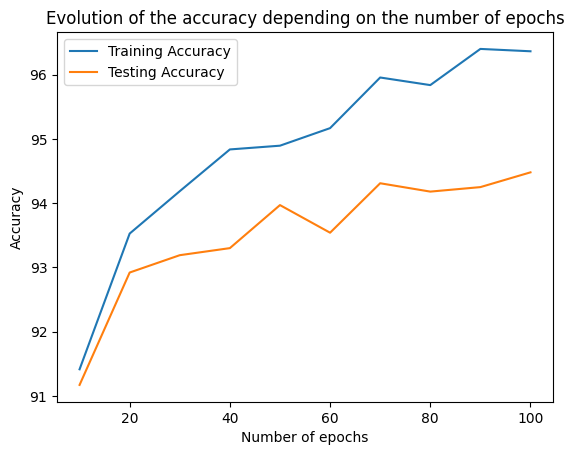

In [32]:
plt.plot(nb_epochs, train_accuracy_epoch_list, label=r'Training Accuracy')
plt.plot(nb_epochs, test_accuracy_epoch_list, label=r'Testing Accuracy')
plt.title(r'Evolution of the accuracy depending on the number of epochs')
plt.xlabel(r'Number of epochs')
plt.ylabel(r'Accuracy')

plt.legend()
plt.show()

Finally, we tried to look at the impact of the number of epochs of training for the model build with the default parameters.

The shape of the plot is a bit surprising, because we thought that increasing the number of epochs will always lead to a better exploration and therefore better results. But we observe a drops, for $60$ epochs. The idea we had to explain it was that because of the random initialization of the weights, the convergence could or not be achieve by our model. But repeating the training several times, we always observe the drop for a training with $60$ epochs. 

**(Question)** We have trained the network using the mean squared error as the loss function. In terms of probabilistic modeling, why is it not the best thing to do? Explain what should be done instead.

Using MSE as the loss function is not the best thing to do because it treats the output as continuous values, which can result in predicted values outside the $[0, 1]$ range, making them unsuitable for interpreting as probabilities. This loss also provides less informative gradients during backpropagation, which can lead to slower convergence and ineffective learning.

Instead, categorical cross-entropy should be used as it is specifically designed for multi-class classification tasks. Categorical cross-entropy compares the predicted probability distribution obtained from the network to the true distribution represented by the one-hot encoded labels.

## 9. Extension to more than one hidden layer

**(Question)** Extend your neural network model to handle more than one hidden layer.

In [33]:
class NeuralNetwork2():
    def __init__(self, layers):
        '''Initialize a neural network with a list of layer sizes.'''
        self.layers = layers
        self.init_weights()

    def init_weights(self):
        '''Initialize random weights and biases for each layer.'''
        self.weights = []
        self.biases = []
        for i in range(len(self.layers) - 1):
            W = np.random.randn(self.layers[i+1], self.layers[i]) * np.sqrt(2. / self.layers[i])
            b = np.zeros((self.layers[i+1], 1))
            self.weights.append(W)
            self.biases.append(b)

    def forward(self, X):
        '''Perform a forward pass through the network.'''
        self.z = []
        self.h = [X]

        for i in range(len(self.weights)):
            z = np.dot(self.weights[i], self.h[-1]) + self.biases[i]
            self.z.append(z)
            h = sigmoid(z) if i < len(self.weights) - 1 else z  # Use sigmoid for hidden layers, linear for last
            self.h.append(h)
        
        return self.h[-1]

    def predict(self, X):
        '''Make predictions for input data.'''
        return np.argmax(self.forward(X), axis=0)

    def backward(self, X, y, d):
        '''Compute gradients for all weights and biases using backpropagation.'''
        m = y.shape[1]
        d_loss = d_squared_error(self.h[-1], d) / m

        d_W = []
        d_b = []
        delta = d_loss * 1

        # Backpropagation from the output layer
        for i in reversed(range(len(self.weights))):
            dW_i = np.dot(delta, self.h[i].T)
            db_i = np.sum(delta, axis=1, keepdims=True)
            d_W.append(dW_i)
            d_b.append(db_i)

            if i > 0:
                delta = np.dot(self.weights[i].T, delta) * d_sigmoid(self.z[i-1])

        return d_W[::-1], d_b[::-1]  # Reverse the lists to match layer order

    def train_iteration(self, X, d, lr=1e-2):
        '''Run a single training iteration and update weights.'''
        y = self.forward(X)

        dW, db = self.backward(X, y, d)

        for i in range(len(self.weights)):
            self.weights[i] -= lr * dW[i]
            self.biases[i] -= lr * db[i]

        loss = squared_error(y, d)
        return loss

    def fit(self, X, d, batch_size, n_epochs=10, lr=1e-2):
        '''Train the network for a specified number of epochs.'''
        n_samples = X.shape[1]
        n_batches = (n_samples // batch_size) + 1

        for e in range(n_epochs):
            epoch_loss = 0.

            permutation = np.random.permutation(n_samples)
            X, d = X[:, permutation], d[:, permutation]

            for b in range(0, n_samples, batch_size):
                X_batch = X[:, b:b+batch_size]
                d_batch = d[:, b:b+batch_size]

                loss = self.train_iteration(X_batch, d_batch, lr)
                epoch_loss += loss

            avg_epoch_loss = epoch_loss / n_batches
            print(f'Epoch {e+1}/{n_epochs}, Loss: {avg_epoch_loss:.6f}')

In [34]:
layer_sizes = [784, 128, 64, 10]  # Input layer (784), two hidden layers (128, 64), output layer (10)

nn2 = NeuralNetwork2(layer_sizes)
nn2.fit(X_train, y_train, batch_size=32, n_epochs=50, lr=0.01)

Epoch 1/50, Loss: 20.466281
Epoch 2/50, Loss: 15.213530
Epoch 3/50, Loss: 13.932881
Epoch 4/50, Loss: 13.239910
Epoch 5/50, Loss: 12.730099
Epoch 6/50, Loss: 12.281764
Epoch 7/50, Loss: 11.839657
Epoch 8/50, Loss: 11.401852
Epoch 9/50, Loss: 10.959928
Epoch 10/50, Loss: 10.509961
Epoch 11/50, Loss: 10.060035
Epoch 12/50, Loss: 9.626754
Epoch 13/50, Loss: 9.207916
Epoch 14/50, Loss: 8.823853
Epoch 15/50, Loss: 8.470030
Epoch 16/50, Loss: 8.150735
Epoch 17/50, Loss: 7.863388
Epoch 18/50, Loss: 7.609194
Epoch 19/50, Loss: 7.385401
Epoch 20/50, Loss: 7.180372
Epoch 21/50, Loss: 6.999831
Epoch 22/50, Loss: 6.835301
Epoch 23/50, Loss: 6.680302
Epoch 24/50, Loss: 6.539901
Epoch 25/50, Loss: 6.415030
Epoch 26/50, Loss: 6.292402
Epoch 27/50, Loss: 6.184431
Epoch 28/50, Loss: 6.080741
Epoch 29/50, Loss: 5.982094
Epoch 30/50, Loss: 5.883964
Epoch 31/50, Loss: 5.795243
Epoch 32/50, Loss: 5.715284
Epoch 33/50, Loss: 5.634022
Epoch 34/50, Loss: 5.557882
Epoch 35/50, Loss: 5.483276
Epoch 36/50, Loss:

In [35]:
train_prediction2 = nn2.predict(X_train)
test_prediction2 = nn2.predict(X_test)

In [36]:
train_accuracy2 = np.mean((labels_train == train_prediction2).astype(int)) * 100
print(f"Training Accuracy : {train_accuracy2:.4f}%")

test_accuracy2 = np.mean((labels_test == test_prediction2).astype(int)) * 100
print(f"Testing Accuracy : {test_accuracy2:.4f}%")

Training Accuracy : 94.2500%
Testing Accuracy : 94.2700%


## 10. Extension to softmax and categorical cross-entropy

**(Question)** Extend your neural network model to use a softmax activation function for the output layer, and a categorical cross-entropy loss.
You can also experiment with the reLU activation for the hidden layer.

*Hint:* recall the partial derivatives formulation from logistic regression, and optimize the backpropagation for the output layer accordingly.

In [37]:
def softmax(a):
    '''Compute the softmax of vector a.'''
    exp_a = np.exp(a - np.max(a, axis=0, keepdims=True))
    return exp_a / np.sum(exp_a, axis=0, keepdims=True)

In [38]:
def categorical_cross_entropy(y, d):
    '''Compute the categorical cross-entropy loss.'''
    return -np.sum(d * np.log(y + 1e-10))

def d_categorical_cross_entropy(y, d):
    '''Compute the gradient of categorical cross-entropy.'''
    return y - d

In [39]:
def relu(a):
    '''ReLU activation function.'''
    return np.maximum(0, a)

def d_relu(a):
    '''Derivative of ReLU activation function.'''
    return (a > 0).astype(float)

In [40]:
class NeuralNetwork3:
    def __init__(self, layer_sizes):
        '''Initialize the neural network with given layer sizes.'''
        self.layer_sizes = layer_sizes
        self.init_weights()

    def init_weights(self):
        '''Initialize weights and biases for each layer.'''
        self.W = []
        self.b = []
        for i in range(len(self.layer_sizes) - 1):
            self.W.append(np.random.randn(self.layer_sizes[i + 1], self.layer_sizes[i]) * 0.01)
            self.b.append(np.zeros((self.layer_sizes[i + 1], 1)))

    def forward(self, X):
        '''Forward pass through the network.'''
        self.a = [X]
        self.h = []

        # Hidden layers (ReLU)
        for i in range(len(self.layer_sizes) - 2):
            z = np.dot(self.W[i], self.a[i]) + self.b[i]
            h = relu(z)
            self.a.append(h)
            self.h.append(h)

        # Output layer
        z = np.dot(self.W[-1], self.a[-1]) + self.b[-1]
        h = softmax(z)
        self.a.append(h)
        return h
    
    def predict(self, X):
        '''Make predictions for input data.'''
        return np.argmax(self.forward(X), axis=0)

    def backward(self, X, y, d):
        '''Backward pass through the network.'''
        d_W = []
        d_b = []

        delta = d_categorical_cross_entropy(y, d)
        dW_last = np.dot(delta, self.h[-1].T)
        db_last = np.sum(delta, axis=1, keepdims=True)
        d_W.append(dW_last)
        d_b.append(db_last)

        # Backpropagation through hidden layers (ReLU)
        for i in reversed(range(len(self.layer_sizes) - 2)):
            delta = np.dot(self.W[i + 1].T, delta) * d_relu(self.h[i])
            dW_i = np.dot(delta, self.a[i].T)
            db_i = np.sum(delta, axis=1, keepdims=True)
            d_W.append(dW_i)
            d_b.append(db_i)

        return d_W[::-1], d_b[::-1]  # Reverse the lists to match layer order

    def train_iteration(self, X, d, lr=1e-2):
        '''One training iteration for the given batch.'''
        y = self.forward(X)
        loss = categorical_cross_entropy(y, d)

        d_W, d_b = self.backward(X, y, d)

        for i in range(len(self.W)):
            self.W[i] -= lr * d_W[i]
            self.b[i] -= lr * d_b[i]

        return loss

    def fit(self, X, d, batch_size, n_epochs=10, lr=1e-2):
        '''Train the network over multiple epochs.'''
        n_samples = X.shape[1]
        for e in range(n_epochs):
            epoch_loss = 0.

            permutation = np.random.permutation(n_samples)
            X, d = X[:, permutation], d[:, permutation]

            for b in range(0, n_samples, batch_size):
                X_batch = X[:, b:b + batch_size]
                d_batch = d[:, b:b + batch_size]

                loss = self.train_iteration(X_batch, d_batch, lr)
                epoch_loss += loss

            avg_epoch_loss = epoch_loss / (n_samples // batch_size)
            print(f'Epoch {e + 1}/{n_epochs}, Loss: {avg_epoch_loss:.6f}')

In [41]:
layer_sizes = [784, 128, 64, 10]  # Input layer (784), two hidden layers (128, 64), output layer (10)

nn3 = NeuralNetwork3(layer_sizes)
nn3.fit(X_train, y_train, batch_size=32, n_epochs=10, lr=0.01)

Epoch 1/10, Loss: 13.720913
Epoch 2/10, Loss: 3.834980
Epoch 3/10, Loss: 2.781242
Epoch 4/10, Loss: 2.149280
Epoch 5/10, Loss: 1.720203
Epoch 6/10, Loss: 1.541245
Epoch 7/10, Loss: 1.280761
Epoch 8/10, Loss: 1.053450
Epoch 9/10, Loss: 0.877745
Epoch 10/10, Loss: 0.849338


In [42]:
train_prediction3 = nn3.predict(X_train)
test_prediction3 = nn3.predict(X_test)

In [43]:
train_accuracy3 = np.mean((labels_train == train_prediction3).astype(int)) * 100
print(f"Training Accuracy : {train_accuracy3:.4f}%")

test_accuracy3 = np.mean((labels_test == test_prediction3).astype(int)) * 100
print(f"Testing Accuracy : {test_accuracy3:.4f}%")

Training Accuracy : 98.7100%
Testing Accuracy : 97.0400%


Testing accuracy:

* 1 hidden-layer: $\approx 90\%$
* Several hidden-layers: $\approx 94\%$
* Adding softmax and categorical cross-entropy: $\approx 97\%$

By incorporating more hidden layers and experimenting with different activation functions and loss functions, the model can learn complex relationships within the data. This flexibility not only improves accuracy such as achieving approximately 97% with softmax and categorical cross-entropy, but also enhances the model's ability to generalize to unseen data.